In [1]:
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sutils import *
import os, json
from os import walk
from glob import glob

from keras.applications import inception_v3
from keras.applications import vgg16
from keras.preprocessing import image 
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

import numpy as np

from keras.applications.imagenet_utils import preprocess_input, decode_predictions

Using TensorFlow backend.


Loading the imagenet model

In [2]:
# create the base pre-trained model
base_model = inception_v3.InceptionV3(weights='imagenet', include_top=True)

In [3]:
base_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 149, 149, 32)  864         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 149, 149, 32)  96          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 149, 149, 32)  0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [4]:
vector_out = base_model.get_layer('avg_pool')

In [5]:
feature_model = Model(inputs=base_model.input, outputs=vector_out.output)

In [6]:
# Images path
image_path = './train/'

# preproc image
def preproc(image_name):
    img_path = os.path.join(image_path, image_name)
    x = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(x)
    return x



In [7]:
image_01 = preproc('cat.0.jpg')
image_01.shape

(299, 299, 3)

In [8]:
image_01 = image_01.reshape(1,299,299,3)

In [9]:
preds = feature_model.predict(image_01)

In [10]:
preds.shape
preds = preds.flatten()


In [11]:
preds.shape

(2048,)

## Full image to Vector functions

In [12]:
def image_to_vector(image_name):
    img_path = os.path.join(image_path, image_name)
    x = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(x)
    x = x.reshape(1,299,299,3)
    preds = feature_model.predict(x)
    preds = preds.flatten()
    return preds


In [13]:
vector_01 = image_to_vector('cat.0.jpg')

In [14]:
vector_01.shape

(2048,)

## Processing Folder full of images

In [19]:
image_path = './train/'
f = []
file_names = []
for (dirpath, dirnames, filenames) in walk(image_path):
    f.extend(filenames)
    for file in f:
        if file.endswith(".jpg"):
            file_names.append(file.replace(".npy",""))
    break

In [20]:

#file_names = file_names[0:1000]
len(file_names)

25000

In [21]:
features = []


for file_name in file_names:
    print(file_name)
    vec = image_to_vector(file_name)
    vectorArray = np.array(vec)
    #record = (file_name,vectorArray)
    features.append(vectorArray)


cat.0.jpg
cat.1.jpg
cat.10.jpg
cat.100.jpg
cat.1000.jpg
cat.10000.jpg
cat.10001.jpg
cat.10002.jpg
cat.10003.jpg
cat.10004.jpg
cat.10005.jpg
cat.10006.jpg
cat.10007.jpg
cat.10008.jpg
cat.10009.jpg
cat.1001.jpg
cat.10010.jpg
cat.10011.jpg
cat.10012.jpg
cat.10013.jpg
cat.10014.jpg
cat.10015.jpg
cat.10016.jpg
cat.10017.jpg
cat.10018.jpg
cat.10019.jpg
cat.1002.jpg
cat.10020.jpg
cat.10021.jpg
cat.10022.jpg
cat.10023.jpg
cat.10024.jpg
cat.10025.jpg
cat.10026.jpg
cat.10027.jpg
cat.10028.jpg
cat.10029.jpg
cat.1003.jpg
cat.10030.jpg
cat.10031.jpg
cat.10032.jpg
cat.10033.jpg
cat.10034.jpg
cat.10035.jpg
cat.10036.jpg
cat.10037.jpg
cat.10038.jpg
cat.10039.jpg
cat.1004.jpg
cat.10040.jpg
cat.10041.jpg
cat.10042.jpg
cat.10043.jpg
cat.10044.jpg
cat.10045.jpg
cat.10046.jpg
cat.10047.jpg
cat.10048.jpg
cat.10049.jpg
cat.1005.jpg
cat.10050.jpg
cat.10051.jpg
cat.10052.jpg
cat.10053.jpg
cat.10054.jpg
cat.10055.jpg
cat.10056.jpg
cat.10057.jpg
cat.10058.jpg
cat.10059.jpg
cat.1006.jpg
cat.10060.jpg
cat.10061.jp

cat.10529.jpg
cat.1053.jpg
cat.10530.jpg
cat.10531.jpg
cat.10532.jpg
cat.10533.jpg
cat.10534.jpg
cat.10535.jpg
cat.10536.jpg
cat.10537.jpg
cat.10538.jpg
cat.10539.jpg
cat.1054.jpg
cat.10540.jpg
cat.10541.jpg
cat.10542.jpg
cat.10543.jpg
cat.10544.jpg
cat.10545.jpg
cat.10546.jpg
cat.10547.jpg
cat.10548.jpg
cat.10549.jpg
cat.1055.jpg
cat.10550.jpg
cat.10551.jpg
cat.10552.jpg
cat.10553.jpg
cat.10554.jpg
cat.10555.jpg
cat.10556.jpg
cat.10557.jpg
cat.10558.jpg
cat.10559.jpg
cat.1056.jpg
cat.10560.jpg
cat.10561.jpg
cat.10562.jpg
cat.10563.jpg
cat.10564.jpg
cat.10565.jpg
cat.10566.jpg
cat.10567.jpg
cat.10568.jpg
cat.10569.jpg
cat.1057.jpg
cat.10570.jpg
cat.10571.jpg
cat.10572.jpg
cat.10573.jpg
cat.10574.jpg
cat.10575.jpg
cat.10576.jpg
cat.10577.jpg
cat.10578.jpg
cat.10579.jpg
cat.1058.jpg
cat.10580.jpg
cat.10581.jpg
cat.10582.jpg
cat.10583.jpg
cat.10584.jpg
cat.10585.jpg
cat.10586.jpg
cat.10587.jpg
cat.10588.jpg
cat.10589.jpg
cat.1059.jpg
cat.10590.jpg
cat.10591.jpg
cat.10592.jpg
cat.10593.jpg

cat.1106.jpg
cat.11060.jpg
cat.11061.jpg
cat.11062.jpg
cat.11063.jpg
cat.11064.jpg
cat.11065.jpg
cat.11066.jpg
cat.11067.jpg
cat.11068.jpg
cat.11069.jpg
cat.1107.jpg
cat.11070.jpg
cat.11071.jpg
cat.11072.jpg
cat.11073.jpg
cat.11074.jpg
cat.11075.jpg
cat.11076.jpg
cat.11077.jpg
cat.11078.jpg
cat.11079.jpg
cat.1108.jpg
cat.11080.jpg
cat.11081.jpg
cat.11082.jpg
cat.11083.jpg
cat.11084.jpg
cat.11085.jpg
cat.11086.jpg
cat.11087.jpg
cat.11088.jpg
cat.11089.jpg
cat.1109.jpg
cat.11090.jpg
cat.11091.jpg
cat.11092.jpg
cat.11093.jpg
cat.11094.jpg
cat.11095.jpg
cat.11096.jpg
cat.11097.jpg
cat.11098.jpg
cat.11099.jpg
cat.111.jpg
cat.1110.jpg
cat.11100.jpg
cat.11101.jpg
cat.11102.jpg
cat.11103.jpg
cat.11104.jpg
cat.11105.jpg
cat.11106.jpg
cat.11107.jpg
cat.11108.jpg
cat.11109.jpg
cat.1111.jpg
cat.11110.jpg
cat.11111.jpg
cat.11112.jpg
cat.11113.jpg
cat.11114.jpg
cat.11115.jpg
cat.11116.jpg
cat.11117.jpg
cat.11118.jpg
cat.11119.jpg
cat.1112.jpg
cat.11120.jpg
cat.11121.jpg
cat.11122.jpg
cat.11123.jpg
c

cat.11591.jpg
cat.11592.jpg
cat.11593.jpg
cat.11594.jpg
cat.11595.jpg
cat.11596.jpg
cat.11597.jpg
cat.11598.jpg
cat.11599.jpg
cat.116.jpg
cat.1160.jpg
cat.11600.jpg
cat.11601.jpg
cat.11602.jpg
cat.11603.jpg
cat.11604.jpg
cat.11605.jpg
cat.11606.jpg
cat.11607.jpg
cat.11608.jpg
cat.11609.jpg
cat.1161.jpg
cat.11610.jpg
cat.11611.jpg
cat.11612.jpg
cat.11613.jpg
cat.11614.jpg
cat.11615.jpg
cat.11616.jpg
cat.11617.jpg
cat.11618.jpg
cat.11619.jpg
cat.1162.jpg
cat.11620.jpg
cat.11621.jpg
cat.11622.jpg
cat.11623.jpg
cat.11624.jpg
cat.11625.jpg
cat.11626.jpg
cat.11627.jpg
cat.11628.jpg
cat.11629.jpg
cat.1163.jpg
cat.11630.jpg
cat.11631.jpg
cat.11632.jpg
cat.11633.jpg
cat.11634.jpg
cat.11635.jpg
cat.11636.jpg
cat.11637.jpg
cat.11638.jpg
cat.11639.jpg
cat.1164.jpg
cat.11640.jpg
cat.11641.jpg
cat.11642.jpg
cat.11643.jpg
cat.11644.jpg
cat.11645.jpg
cat.11646.jpg
cat.11647.jpg
cat.11648.jpg
cat.11649.jpg
cat.1165.jpg
cat.11650.jpg
cat.11651.jpg
cat.11652.jpg
cat.11653.jpg
cat.11654.jpg
cat.11655.jpg


cat.12122.jpg
cat.12123.jpg
cat.12124.jpg
cat.12125.jpg
cat.12126.jpg
cat.12127.jpg
cat.12128.jpg
cat.12129.jpg
cat.1213.jpg
cat.12130.jpg
cat.12131.jpg
cat.12132.jpg
cat.12133.jpg
cat.12134.jpg
cat.12135.jpg
cat.12136.jpg
cat.12137.jpg
cat.12138.jpg
cat.12139.jpg
cat.1214.jpg
cat.12140.jpg
cat.12141.jpg
cat.12142.jpg
cat.12143.jpg
cat.12144.jpg
cat.12145.jpg
cat.12146.jpg
cat.12147.jpg
cat.12148.jpg
cat.12149.jpg
cat.1215.jpg
cat.12150.jpg
cat.12151.jpg
cat.12152.jpg
cat.12153.jpg
cat.12154.jpg
cat.12155.jpg
cat.12156.jpg
cat.12157.jpg
cat.12158.jpg
cat.12159.jpg
cat.1216.jpg
cat.12160.jpg
cat.12161.jpg
cat.12162.jpg
cat.12163.jpg
cat.12164.jpg
cat.12165.jpg
cat.12166.jpg
cat.12167.jpg
cat.12168.jpg
cat.12169.jpg
cat.1217.jpg
cat.12170.jpg
cat.12171.jpg
cat.12172.jpg
cat.12173.jpg
cat.12174.jpg
cat.12175.jpg
cat.12176.jpg
cat.12177.jpg
cat.12178.jpg
cat.12179.jpg
cat.1218.jpg
cat.12180.jpg
cat.12181.jpg
cat.12182.jpg
cat.12183.jpg
cat.12184.jpg
cat.12185.jpg
cat.12186.jpg
cat.12187.jp

cat.1416.jpg
cat.1417.jpg
cat.1418.jpg
cat.1419.jpg
cat.142.jpg
cat.1420.jpg
cat.1421.jpg
cat.1422.jpg
cat.1423.jpg
cat.1424.jpg
cat.1425.jpg
cat.1426.jpg
cat.1427.jpg
cat.1428.jpg
cat.1429.jpg
cat.143.jpg
cat.1430.jpg
cat.1431.jpg
cat.1432.jpg
cat.1433.jpg
cat.1434.jpg
cat.1435.jpg
cat.1436.jpg
cat.1437.jpg
cat.1438.jpg
cat.1439.jpg
cat.144.jpg
cat.1440.jpg
cat.1441.jpg
cat.1442.jpg
cat.1443.jpg
cat.1444.jpg
cat.1445.jpg
cat.1446.jpg
cat.1447.jpg
cat.1448.jpg
cat.1449.jpg
cat.145.jpg
cat.1450.jpg
cat.1451.jpg
cat.1452.jpg
cat.1453.jpg
cat.1454.jpg
cat.1455.jpg
cat.1456.jpg
cat.1457.jpg
cat.1458.jpg
cat.1459.jpg
cat.146.jpg
cat.1460.jpg
cat.1461.jpg
cat.1462.jpg
cat.1463.jpg
cat.1464.jpg
cat.1465.jpg
cat.1466.jpg
cat.1467.jpg
cat.1468.jpg
cat.1469.jpg
cat.147.jpg
cat.1470.jpg
cat.1471.jpg
cat.1472.jpg
cat.1473.jpg
cat.1474.jpg
cat.1475.jpg
cat.1476.jpg
cat.1477.jpg
cat.1478.jpg
cat.1479.jpg
cat.148.jpg
cat.1480.jpg
cat.1481.jpg
cat.1482.jpg
cat.1483.jpg
cat.1484.jpg
cat.1485.jpg
cat.14

cat.199.jpg
cat.1990.jpg
cat.1991.jpg
cat.1992.jpg
cat.1993.jpg
cat.1994.jpg
cat.1995.jpg
cat.1996.jpg
cat.1997.jpg
cat.1998.jpg
cat.1999.jpg
cat.2.jpg
cat.20.jpg
cat.200.jpg
cat.2000.jpg
cat.2001.jpg
cat.2002.jpg
cat.2003.jpg
cat.2004.jpg
cat.2005.jpg
cat.2006.jpg
cat.2007.jpg
cat.2008.jpg
cat.2009.jpg
cat.201.jpg
cat.2010.jpg
cat.2011.jpg
cat.2012.jpg
cat.2013.jpg
cat.2014.jpg
cat.2015.jpg
cat.2016.jpg
cat.2017.jpg
cat.2018.jpg
cat.2019.jpg
cat.202.jpg
cat.2020.jpg
cat.2021.jpg
cat.2022.jpg
cat.2023.jpg
cat.2024.jpg
cat.2025.jpg
cat.2026.jpg
cat.2027.jpg
cat.2028.jpg
cat.2029.jpg
cat.203.jpg
cat.2030.jpg
cat.2031.jpg
cat.2032.jpg
cat.2033.jpg
cat.2034.jpg
cat.2035.jpg
cat.2036.jpg
cat.2037.jpg
cat.2038.jpg
cat.2039.jpg
cat.204.jpg
cat.2040.jpg
cat.2041.jpg
cat.2042.jpg
cat.2043.jpg
cat.2044.jpg
cat.2045.jpg
cat.2046.jpg
cat.2047.jpg
cat.2048.jpg
cat.2049.jpg
cat.205.jpg
cat.2050.jpg
cat.2051.jpg
cat.2052.jpg
cat.2053.jpg
cat.2054.jpg
cat.2055.jpg
cat.2056.jpg
cat.2057.jpg
cat.2058.jp

cat.2561.jpg
cat.2562.jpg
cat.2563.jpg
cat.2564.jpg
cat.2565.jpg
cat.2566.jpg
cat.2567.jpg
cat.2568.jpg
cat.2569.jpg
cat.257.jpg
cat.2570.jpg
cat.2571.jpg
cat.2572.jpg
cat.2573.jpg
cat.2574.jpg
cat.2575.jpg
cat.2576.jpg
cat.2577.jpg
cat.2578.jpg
cat.2579.jpg
cat.258.jpg
cat.2580.jpg
cat.2581.jpg
cat.2582.jpg
cat.2583.jpg
cat.2584.jpg
cat.2585.jpg
cat.2586.jpg
cat.2587.jpg
cat.2588.jpg
cat.2589.jpg
cat.259.jpg
cat.2590.jpg
cat.2591.jpg
cat.2592.jpg
cat.2593.jpg
cat.2594.jpg
cat.2595.jpg
cat.2596.jpg
cat.2597.jpg
cat.2598.jpg
cat.2599.jpg
cat.26.jpg
cat.260.jpg
cat.2600.jpg
cat.2601.jpg
cat.2602.jpg
cat.2603.jpg
cat.2604.jpg
cat.2605.jpg
cat.2606.jpg
cat.2607.jpg
cat.2608.jpg
cat.2609.jpg
cat.261.jpg
cat.2610.jpg
cat.2611.jpg
cat.2612.jpg
cat.2613.jpg
cat.2614.jpg
cat.2615.jpg
cat.2616.jpg
cat.2617.jpg
cat.2618.jpg
cat.2619.jpg
cat.262.jpg
cat.2620.jpg
cat.2621.jpg
cat.2622.jpg
cat.2623.jpg
cat.2624.jpg
cat.2625.jpg
cat.2626.jpg
cat.2627.jpg
cat.2628.jpg
cat.2629.jpg
cat.263.jpg
cat.2630

cat.3133.jpg
cat.3134.jpg
cat.3135.jpg
cat.3136.jpg
cat.3137.jpg
cat.3138.jpg
cat.3139.jpg
cat.314.jpg
cat.3140.jpg
cat.3141.jpg
cat.3142.jpg
cat.3143.jpg
cat.3144.jpg
cat.3145.jpg
cat.3146.jpg
cat.3147.jpg
cat.3148.jpg
cat.3149.jpg
cat.315.jpg
cat.3150.jpg
cat.3151.jpg
cat.3152.jpg
cat.3153.jpg
cat.3154.jpg
cat.3155.jpg
cat.3156.jpg
cat.3157.jpg
cat.3158.jpg
cat.3159.jpg
cat.316.jpg
cat.3160.jpg
cat.3161.jpg
cat.3162.jpg
cat.3163.jpg
cat.3164.jpg
cat.3165.jpg
cat.3166.jpg
cat.3167.jpg
cat.3168.jpg
cat.3169.jpg
cat.317.jpg
cat.3170.jpg
cat.3171.jpg
cat.3172.jpg
cat.3173.jpg
cat.3174.jpg
cat.3175.jpg
cat.3176.jpg
cat.3177.jpg
cat.3178.jpg
cat.3179.jpg
cat.318.jpg
cat.3180.jpg
cat.3181.jpg
cat.3182.jpg
cat.3183.jpg
cat.3184.jpg
cat.3185.jpg
cat.3186.jpg
cat.3187.jpg
cat.3188.jpg
cat.3189.jpg
cat.319.jpg
cat.3190.jpg
cat.3191.jpg
cat.3192.jpg
cat.3193.jpg
cat.3194.jpg
cat.3195.jpg
cat.3196.jpg
cat.3197.jpg
cat.3198.jpg
cat.3199.jpg
cat.32.jpg
cat.320.jpg
cat.3200.jpg
cat.3201.jpg
cat.3202

cat.3706.jpg
cat.3707.jpg
cat.3708.jpg
cat.3709.jpg
cat.371.jpg
cat.3710.jpg
cat.3711.jpg
cat.3712.jpg
cat.3713.jpg
cat.3714.jpg
cat.3715.jpg
cat.3716.jpg
cat.3717.jpg
cat.3718.jpg
cat.3719.jpg
cat.372.jpg
cat.3720.jpg
cat.3721.jpg
cat.3722.jpg
cat.3723.jpg
cat.3724.jpg
cat.3725.jpg
cat.3726.jpg
cat.3727.jpg
cat.3728.jpg
cat.3729.jpg
cat.373.jpg
cat.3730.jpg
cat.3731.jpg
cat.3732.jpg
cat.3733.jpg
cat.3734.jpg
cat.3735.jpg
cat.3736.jpg
cat.3737.jpg
cat.3738.jpg
cat.3739.jpg
cat.374.jpg
cat.3740.jpg
cat.3741.jpg
cat.3742.jpg
cat.3743.jpg
cat.3744.jpg
cat.3745.jpg
cat.3746.jpg
cat.3747.jpg
cat.3748.jpg
cat.3749.jpg
cat.375.jpg
cat.3750.jpg
cat.3751.jpg
cat.3752.jpg
cat.3753.jpg
cat.3754.jpg
cat.3755.jpg
cat.3756.jpg
cat.3757.jpg
cat.3758.jpg
cat.3759.jpg
cat.376.jpg
cat.3760.jpg
cat.3761.jpg
cat.3762.jpg
cat.3763.jpg
cat.3764.jpg
cat.3765.jpg
cat.3766.jpg
cat.3767.jpg
cat.3768.jpg
cat.3769.jpg
cat.377.jpg
cat.3770.jpg
cat.3771.jpg
cat.3772.jpg
cat.3773.jpg
cat.3774.jpg
cat.3775.jpg
cat.37

cat.4279.jpg
cat.428.jpg
cat.4280.jpg
cat.4281.jpg
cat.4282.jpg
cat.4283.jpg
cat.4284.jpg
cat.4285.jpg
cat.4286.jpg
cat.4287.jpg
cat.4288.jpg
cat.4289.jpg
cat.429.jpg
cat.4290.jpg
cat.4291.jpg
cat.4292.jpg
cat.4293.jpg
cat.4294.jpg
cat.4295.jpg
cat.4296.jpg
cat.4297.jpg
cat.4298.jpg
cat.4299.jpg
cat.43.jpg
cat.430.jpg
cat.4300.jpg
cat.4301.jpg
cat.4302.jpg
cat.4303.jpg
cat.4304.jpg
cat.4305.jpg
cat.4306.jpg
cat.4307.jpg
cat.4308.jpg
cat.4309.jpg
cat.431.jpg
cat.4310.jpg
cat.4311.jpg
cat.4312.jpg
cat.4313.jpg
cat.4314.jpg
cat.4315.jpg
cat.4316.jpg
cat.4317.jpg
cat.4318.jpg
cat.4319.jpg
cat.432.jpg
cat.4320.jpg
cat.4321.jpg
cat.4322.jpg
cat.4323.jpg
cat.4324.jpg
cat.4325.jpg
cat.4326.jpg
cat.4327.jpg
cat.4328.jpg
cat.4329.jpg
cat.433.jpg
cat.4330.jpg
cat.4331.jpg
cat.4332.jpg
cat.4333.jpg
cat.4334.jpg
cat.4335.jpg
cat.4336.jpg
cat.4337.jpg
cat.4338.jpg
cat.4339.jpg
cat.434.jpg
cat.4340.jpg
cat.4341.jpg
cat.4342.jpg
cat.4343.jpg
cat.4344.jpg
cat.4345.jpg
cat.4346.jpg
cat.4347.jpg
cat.4348

cat.4851.jpg
cat.4852.jpg
cat.4853.jpg
cat.4854.jpg
cat.4855.jpg
cat.4856.jpg
cat.4857.jpg
cat.4858.jpg
cat.4859.jpg
cat.486.jpg
cat.4860.jpg
cat.4861.jpg
cat.4862.jpg
cat.4863.jpg
cat.4864.jpg
cat.4865.jpg
cat.4866.jpg
cat.4867.jpg
cat.4868.jpg
cat.4869.jpg
cat.487.jpg
cat.4870.jpg
cat.4871.jpg
cat.4872.jpg
cat.4873.jpg
cat.4874.jpg
cat.4875.jpg
cat.4876.jpg
cat.4877.jpg
cat.4878.jpg
cat.4879.jpg
cat.488.jpg
cat.4880.jpg
cat.4881.jpg
cat.4882.jpg
cat.4883.jpg
cat.4884.jpg
cat.4885.jpg
cat.4886.jpg
cat.4887.jpg
cat.4888.jpg
cat.4889.jpg
cat.489.jpg
cat.4890.jpg
cat.4891.jpg
cat.4892.jpg
cat.4893.jpg
cat.4894.jpg
cat.4895.jpg
cat.4896.jpg
cat.4897.jpg
cat.4898.jpg
cat.4899.jpg
cat.49.jpg
cat.490.jpg
cat.4900.jpg
cat.4901.jpg
cat.4902.jpg
cat.4903.jpg
cat.4904.jpg
cat.4905.jpg
cat.4906.jpg
cat.4907.jpg
cat.4908.jpg
cat.4909.jpg
cat.491.jpg
cat.4910.jpg
cat.4911.jpg
cat.4912.jpg
cat.4913.jpg
cat.4914.jpg
cat.4915.jpg
cat.4916.jpg
cat.4917.jpg
cat.4918.jpg
cat.4919.jpg
cat.492.jpg
cat.4920

cat.5423.jpg
cat.5424.jpg
cat.5425.jpg
cat.5426.jpg
cat.5427.jpg
cat.5428.jpg
cat.5429.jpg
cat.543.jpg
cat.5430.jpg
cat.5431.jpg
cat.5432.jpg
cat.5433.jpg
cat.5434.jpg
cat.5435.jpg
cat.5436.jpg
cat.5437.jpg
cat.5438.jpg
cat.5439.jpg
cat.544.jpg
cat.5440.jpg
cat.5441.jpg
cat.5442.jpg
cat.5443.jpg
cat.5444.jpg
cat.5445.jpg
cat.5446.jpg
cat.5447.jpg
cat.5448.jpg
cat.5449.jpg
cat.545.jpg
cat.5450.jpg
cat.5451.jpg
cat.5452.jpg
cat.5453.jpg
cat.5454.jpg
cat.5455.jpg
cat.5456.jpg
cat.5457.jpg
cat.5458.jpg
cat.5459.jpg
cat.546.jpg
cat.5460.jpg
cat.5461.jpg
cat.5462.jpg
cat.5463.jpg
cat.5464.jpg
cat.5465.jpg
cat.5466.jpg
cat.5467.jpg
cat.5468.jpg
cat.5469.jpg
cat.547.jpg
cat.5470.jpg
cat.5471.jpg
cat.5472.jpg
cat.5473.jpg
cat.5474.jpg
cat.5475.jpg
cat.5476.jpg
cat.5477.jpg
cat.5478.jpg
cat.5479.jpg
cat.548.jpg
cat.5480.jpg
cat.5481.jpg
cat.5482.jpg
cat.5483.jpg
cat.5484.jpg
cat.5485.jpg
cat.5486.jpg
cat.5487.jpg
cat.5488.jpg
cat.5489.jpg
cat.549.jpg
cat.5490.jpg
cat.5491.jpg
cat.5492.jpg
cat.54

cat.5997.jpg
cat.5998.jpg
cat.5999.jpg
cat.6.jpg
cat.60.jpg
cat.600.jpg
cat.6000.jpg
cat.6001.jpg
cat.6002.jpg
cat.6003.jpg
cat.6004.jpg
cat.6005.jpg
cat.6006.jpg
cat.6007.jpg
cat.6008.jpg
cat.6009.jpg
cat.601.jpg
cat.6010.jpg
cat.6011.jpg
cat.6012.jpg
cat.6013.jpg
cat.6014.jpg
cat.6015.jpg
cat.6016.jpg
cat.6017.jpg
cat.6018.jpg
cat.6019.jpg
cat.602.jpg
cat.6020.jpg
cat.6021.jpg
cat.6022.jpg
cat.6023.jpg
cat.6024.jpg
cat.6025.jpg
cat.6026.jpg
cat.6027.jpg
cat.6028.jpg
cat.6029.jpg
cat.603.jpg
cat.6030.jpg
cat.6031.jpg
cat.6032.jpg
cat.6033.jpg
cat.6034.jpg
cat.6035.jpg
cat.6036.jpg
cat.6037.jpg
cat.6038.jpg
cat.6039.jpg
cat.604.jpg
cat.6040.jpg
cat.6041.jpg
cat.6042.jpg
cat.6043.jpg
cat.6044.jpg
cat.6045.jpg
cat.6046.jpg
cat.6047.jpg
cat.6048.jpg
cat.6049.jpg
cat.605.jpg
cat.6050.jpg
cat.6051.jpg
cat.6052.jpg
cat.6053.jpg
cat.6054.jpg
cat.6055.jpg
cat.6056.jpg
cat.6057.jpg
cat.6058.jpg
cat.6059.jpg
cat.606.jpg
cat.6060.jpg
cat.6061.jpg
cat.6062.jpg
cat.6063.jpg
cat.6064.jpg
cat.6065.jp

cat.6569.jpg
cat.657.jpg
cat.6570.jpg
cat.6571.jpg
cat.6572.jpg
cat.6573.jpg
cat.6574.jpg
cat.6575.jpg
cat.6576.jpg
cat.6577.jpg
cat.6578.jpg
cat.6579.jpg
cat.658.jpg
cat.6580.jpg
cat.6581.jpg
cat.6582.jpg
cat.6583.jpg
cat.6584.jpg
cat.6585.jpg
cat.6586.jpg
cat.6587.jpg
cat.6588.jpg
cat.6589.jpg
cat.659.jpg
cat.6590.jpg
cat.6591.jpg
cat.6592.jpg
cat.6593.jpg
cat.6594.jpg
cat.6595.jpg
cat.6596.jpg
cat.6597.jpg
cat.6598.jpg
cat.6599.jpg
cat.66.jpg
cat.660.jpg
cat.6600.jpg
cat.6601.jpg
cat.6602.jpg
cat.6603.jpg
cat.6604.jpg
cat.6605.jpg
cat.6606.jpg
cat.6607.jpg
cat.6608.jpg
cat.6609.jpg
cat.661.jpg
cat.6610.jpg
cat.6611.jpg
cat.6612.jpg
cat.6613.jpg
cat.6614.jpg
cat.6615.jpg
cat.6616.jpg
cat.6617.jpg
cat.6618.jpg
cat.6619.jpg
cat.662.jpg
cat.6620.jpg
cat.6621.jpg
cat.6622.jpg
cat.6623.jpg
cat.6624.jpg
cat.6625.jpg
cat.6626.jpg
cat.6627.jpg
cat.6628.jpg
cat.6629.jpg
cat.663.jpg
cat.6630.jpg
cat.6631.jpg
cat.6632.jpg
cat.6633.jpg
cat.6634.jpg
cat.6635.jpg
cat.6636.jpg
cat.6637.jpg
cat.6638

cat.7140.jpg
cat.7141.jpg
cat.7142.jpg
cat.7143.jpg
cat.7144.jpg
cat.7145.jpg
cat.7146.jpg
cat.7147.jpg
cat.7148.jpg
cat.7149.jpg
cat.715.jpg
cat.7150.jpg
cat.7151.jpg
cat.7152.jpg
cat.7153.jpg
cat.7154.jpg
cat.7155.jpg
cat.7156.jpg
cat.7157.jpg
cat.7158.jpg
cat.7159.jpg
cat.716.jpg
cat.7160.jpg
cat.7161.jpg
cat.7162.jpg
cat.7163.jpg
cat.7164.jpg
cat.7165.jpg
cat.7166.jpg
cat.7167.jpg
cat.7168.jpg
cat.7169.jpg
cat.717.jpg
cat.7170.jpg
cat.7171.jpg
cat.7172.jpg
cat.7173.jpg
cat.7174.jpg
cat.7175.jpg
cat.7176.jpg
cat.7177.jpg
cat.7178.jpg
cat.7179.jpg
cat.718.jpg
cat.7180.jpg
cat.7181.jpg
cat.7182.jpg
cat.7183.jpg
cat.7184.jpg
cat.7185.jpg
cat.7186.jpg
cat.7187.jpg
cat.7188.jpg
cat.7189.jpg
cat.719.jpg
cat.7190.jpg
cat.7191.jpg
cat.7192.jpg
cat.7193.jpg
cat.7194.jpg
cat.7195.jpg
cat.7196.jpg
cat.7197.jpg
cat.7198.jpg
cat.7199.jpg
cat.72.jpg
cat.720.jpg
cat.7200.jpg
cat.7201.jpg
cat.7202.jpg
cat.7203.jpg
cat.7204.jpg
cat.7205.jpg
cat.7206.jpg
cat.7207.jpg
cat.7208.jpg
cat.7209.jpg
cat.721

cat.7713.jpg
cat.7714.jpg
cat.7715.jpg
cat.7716.jpg
cat.7717.jpg
cat.7718.jpg
cat.7719.jpg
cat.772.jpg
cat.7720.jpg
cat.7721.jpg
cat.7722.jpg
cat.7723.jpg
cat.7724.jpg
cat.7725.jpg
cat.7726.jpg
cat.7727.jpg
cat.7728.jpg
cat.7729.jpg
cat.773.jpg
cat.7730.jpg
cat.7731.jpg
cat.7732.jpg
cat.7733.jpg
cat.7734.jpg
cat.7735.jpg
cat.7736.jpg
cat.7737.jpg
cat.7738.jpg
cat.7739.jpg
cat.774.jpg
cat.7740.jpg
cat.7741.jpg
cat.7742.jpg
cat.7743.jpg
cat.7744.jpg
cat.7745.jpg
cat.7746.jpg
cat.7747.jpg
cat.7748.jpg
cat.7749.jpg
cat.775.jpg
cat.7750.jpg
cat.7751.jpg
cat.7752.jpg
cat.7753.jpg
cat.7754.jpg
cat.7755.jpg
cat.7756.jpg
cat.7757.jpg
cat.7758.jpg
cat.7759.jpg
cat.776.jpg
cat.7760.jpg
cat.7761.jpg
cat.7762.jpg
cat.7763.jpg
cat.7764.jpg
cat.7765.jpg
cat.7766.jpg
cat.7767.jpg
cat.7768.jpg
cat.7769.jpg
cat.777.jpg
cat.7770.jpg
cat.7771.jpg
cat.7772.jpg
cat.7773.jpg
cat.7774.jpg
cat.7775.jpg
cat.7776.jpg
cat.7777.jpg
cat.7778.jpg
cat.7779.jpg
cat.778.jpg
cat.7780.jpg
cat.7781.jpg
cat.7782.jpg
cat.77

cat.8286.jpg
cat.8287.jpg
cat.8288.jpg
cat.8289.jpg
cat.829.jpg
cat.8290.jpg
cat.8291.jpg
cat.8292.jpg
cat.8293.jpg
cat.8294.jpg
cat.8295.jpg
cat.8296.jpg
cat.8297.jpg
cat.8298.jpg
cat.8299.jpg
cat.83.jpg
cat.830.jpg
cat.8300.jpg
cat.8301.jpg
cat.8302.jpg
cat.8303.jpg
cat.8304.jpg
cat.8305.jpg
cat.8306.jpg
cat.8307.jpg
cat.8308.jpg
cat.8309.jpg
cat.831.jpg
cat.8310.jpg
cat.8311.jpg
cat.8312.jpg
cat.8313.jpg
cat.8314.jpg
cat.8315.jpg
cat.8316.jpg
cat.8317.jpg
cat.8318.jpg
cat.8319.jpg
cat.832.jpg
cat.8320.jpg
cat.8321.jpg
cat.8322.jpg
cat.8323.jpg
cat.8324.jpg
cat.8325.jpg
cat.8326.jpg
cat.8327.jpg
cat.8328.jpg
cat.8329.jpg
cat.833.jpg
cat.8330.jpg
cat.8331.jpg
cat.8332.jpg
cat.8333.jpg
cat.8334.jpg
cat.8335.jpg
cat.8336.jpg
cat.8337.jpg
cat.8338.jpg
cat.8339.jpg
cat.834.jpg
cat.8340.jpg
cat.8341.jpg
cat.8342.jpg
cat.8343.jpg
cat.8344.jpg
cat.8345.jpg
cat.8346.jpg
cat.8347.jpg
cat.8348.jpg
cat.8349.jpg
cat.835.jpg
cat.8350.jpg
cat.8351.jpg
cat.8352.jpg
cat.8353.jpg
cat.8354.jpg
cat.8355

cat.8859.jpg
cat.886.jpg
cat.8860.jpg
cat.8861.jpg
cat.8862.jpg
cat.8863.jpg
cat.8864.jpg
cat.8865.jpg
cat.8866.jpg
cat.8867.jpg
cat.8868.jpg
cat.8869.jpg
cat.887.jpg
cat.8870.jpg
cat.8871.jpg
cat.8872.jpg
cat.8873.jpg
cat.8874.jpg
cat.8875.jpg
cat.8876.jpg
cat.8877.jpg
cat.8878.jpg
cat.8879.jpg
cat.888.jpg
cat.8880.jpg
cat.8881.jpg
cat.8882.jpg
cat.8883.jpg
cat.8884.jpg
cat.8885.jpg
cat.8886.jpg
cat.8887.jpg
cat.8888.jpg
cat.8889.jpg
cat.889.jpg
cat.8890.jpg
cat.8891.jpg
cat.8892.jpg
cat.8893.jpg
cat.8894.jpg
cat.8895.jpg
cat.8896.jpg
cat.8897.jpg
cat.8898.jpg
cat.8899.jpg
cat.89.jpg
cat.890.jpg
cat.8900.jpg
cat.8901.jpg
cat.8902.jpg
cat.8903.jpg
cat.8904.jpg
cat.8905.jpg
cat.8906.jpg
cat.8907.jpg
cat.8908.jpg
cat.8909.jpg
cat.891.jpg
cat.8910.jpg
cat.8911.jpg
cat.8912.jpg
cat.8913.jpg
cat.8914.jpg
cat.8915.jpg
cat.8916.jpg
cat.8917.jpg
cat.8918.jpg
cat.8919.jpg
cat.892.jpg
cat.8920.jpg
cat.8921.jpg
cat.8922.jpg
cat.8923.jpg
cat.8924.jpg
cat.8925.jpg
cat.8926.jpg
cat.8927.jpg
cat.8928

cat.9430.jpg
cat.9431.jpg
cat.9432.jpg
cat.9433.jpg
cat.9434.jpg
cat.9435.jpg
cat.9436.jpg
cat.9437.jpg
cat.9438.jpg
cat.9439.jpg
cat.944.jpg
cat.9440.jpg
cat.9441.jpg
cat.9442.jpg
cat.9443.jpg
cat.9444.jpg
cat.9445.jpg
cat.9446.jpg
cat.9447.jpg
cat.9448.jpg
cat.9449.jpg
cat.945.jpg
cat.9450.jpg
cat.9451.jpg
cat.9452.jpg
cat.9453.jpg
cat.9454.jpg
cat.9455.jpg
cat.9456.jpg
cat.9457.jpg
cat.9458.jpg
cat.9459.jpg
cat.946.jpg
cat.9460.jpg
cat.9461.jpg
cat.9462.jpg
cat.9463.jpg
cat.9464.jpg
cat.9465.jpg
cat.9466.jpg
cat.9467.jpg
cat.9468.jpg
cat.9469.jpg
cat.947.jpg
cat.9470.jpg
cat.9471.jpg
cat.9472.jpg
cat.9473.jpg
cat.9474.jpg
cat.9475.jpg
cat.9476.jpg
cat.9477.jpg
cat.9478.jpg
cat.9479.jpg
cat.948.jpg
cat.9480.jpg
cat.9481.jpg
cat.9482.jpg
cat.9483.jpg
cat.9484.jpg
cat.9485.jpg
cat.9486.jpg
cat.9487.jpg
cat.9488.jpg
cat.9489.jpg
cat.949.jpg
cat.9490.jpg
cat.9491.jpg
cat.9492.jpg
cat.9493.jpg
cat.9494.jpg
cat.9495.jpg
cat.9496.jpg
cat.9497.jpg
cat.9498.jpg
cat.9499.jpg
cat.95.jpg
cat.950

dog.10000.jpg
dog.10001.jpg
dog.10002.jpg
dog.10003.jpg
dog.10004.jpg
dog.10005.jpg
dog.10006.jpg
dog.10007.jpg
dog.10008.jpg
dog.10009.jpg
dog.1001.jpg
dog.10010.jpg
dog.10011.jpg
dog.10012.jpg
dog.10013.jpg
dog.10014.jpg
dog.10015.jpg
dog.10016.jpg
dog.10017.jpg
dog.10018.jpg
dog.10019.jpg
dog.1002.jpg
dog.10020.jpg
dog.10021.jpg
dog.10022.jpg
dog.10023.jpg
dog.10024.jpg
dog.10025.jpg
dog.10026.jpg
dog.10027.jpg
dog.10028.jpg
dog.10029.jpg
dog.1003.jpg
dog.10030.jpg
dog.10031.jpg
dog.10032.jpg
dog.10033.jpg
dog.10034.jpg
dog.10035.jpg
dog.10036.jpg
dog.10037.jpg
dog.10038.jpg
dog.10039.jpg
dog.1004.jpg
dog.10040.jpg
dog.10041.jpg
dog.10042.jpg
dog.10043.jpg
dog.10044.jpg
dog.10045.jpg
dog.10046.jpg
dog.10047.jpg
dog.10048.jpg
dog.10049.jpg
dog.1005.jpg
dog.10050.jpg
dog.10051.jpg
dog.10052.jpg
dog.10053.jpg
dog.10054.jpg
dog.10055.jpg
dog.10056.jpg
dog.10057.jpg
dog.10058.jpg
dog.10059.jpg
dog.1006.jpg
dog.10060.jpg
dog.10061.jpg
dog.10062.jpg
dog.10063.jpg
dog.10064.jpg
dog.10065.jp

dog.10532.jpg
dog.10533.jpg
dog.10534.jpg
dog.10535.jpg
dog.10536.jpg
dog.10537.jpg
dog.10538.jpg
dog.10539.jpg
dog.1054.jpg
dog.10540.jpg
dog.10541.jpg
dog.10542.jpg
dog.10543.jpg
dog.10544.jpg
dog.10545.jpg
dog.10546.jpg
dog.10547.jpg
dog.10548.jpg
dog.10549.jpg
dog.1055.jpg
dog.10550.jpg
dog.10551.jpg
dog.10552.jpg
dog.10553.jpg
dog.10554.jpg
dog.10555.jpg
dog.10556.jpg
dog.10557.jpg
dog.10558.jpg
dog.10559.jpg
dog.1056.jpg
dog.10560.jpg
dog.10561.jpg
dog.10562.jpg
dog.10563.jpg
dog.10564.jpg
dog.10565.jpg
dog.10566.jpg
dog.10567.jpg
dog.10568.jpg
dog.10569.jpg
dog.1057.jpg
dog.10570.jpg
dog.10571.jpg
dog.10572.jpg
dog.10573.jpg
dog.10574.jpg
dog.10575.jpg
dog.10576.jpg
dog.10577.jpg
dog.10578.jpg
dog.10579.jpg
dog.1058.jpg
dog.10580.jpg
dog.10581.jpg
dog.10582.jpg
dog.10583.jpg
dog.10584.jpg
dog.10585.jpg
dog.10586.jpg
dog.10587.jpg
dog.10588.jpg
dog.10589.jpg
dog.1059.jpg
dog.10590.jpg
dog.10591.jpg
dog.10592.jpg
dog.10593.jpg
dog.10594.jpg
dog.10595.jpg
dog.10596.jpg
dog.10597.jp

dog.11063.jpg
dog.11064.jpg
dog.11065.jpg
dog.11066.jpg
dog.11067.jpg
dog.11068.jpg
dog.11069.jpg
dog.1107.jpg
dog.11070.jpg
dog.11071.jpg
dog.11072.jpg
dog.11073.jpg
dog.11074.jpg
dog.11075.jpg
dog.11076.jpg
dog.11077.jpg
dog.11078.jpg
dog.11079.jpg
dog.1108.jpg
dog.11080.jpg
dog.11081.jpg
dog.11082.jpg
dog.11083.jpg
dog.11084.jpg
dog.11085.jpg
dog.11086.jpg
dog.11087.jpg
dog.11088.jpg
dog.11089.jpg
dog.1109.jpg
dog.11090.jpg
dog.11091.jpg
dog.11092.jpg
dog.11093.jpg
dog.11094.jpg
dog.11095.jpg
dog.11096.jpg
dog.11097.jpg
dog.11098.jpg
dog.11099.jpg
dog.111.jpg
dog.1110.jpg
dog.11100.jpg
dog.11101.jpg
dog.11102.jpg
dog.11103.jpg
dog.11104.jpg
dog.11105.jpg
dog.11106.jpg
dog.11107.jpg
dog.11108.jpg
dog.11109.jpg
dog.1111.jpg
dog.11110.jpg
dog.11111.jpg
dog.11112.jpg
dog.11113.jpg
dog.11114.jpg
dog.11115.jpg
dog.11116.jpg
dog.11117.jpg
dog.11118.jpg
dog.11119.jpg
dog.1112.jpg
dog.11120.jpg
dog.11121.jpg
dog.11122.jpg
dog.11123.jpg
dog.11124.jpg
dog.11125.jpg
dog.11126.jpg
dog.11127.jpg


dog.11595.jpg
dog.11596.jpg
dog.11597.jpg
dog.11598.jpg
dog.11599.jpg
dog.116.jpg
dog.1160.jpg
dog.11600.jpg
dog.11601.jpg
dog.11602.jpg
dog.11603.jpg
dog.11604.jpg
dog.11605.jpg
dog.11606.jpg
dog.11607.jpg
dog.11608.jpg
dog.11609.jpg
dog.1161.jpg
dog.11610.jpg
dog.11611.jpg
dog.11612.jpg
dog.11613.jpg
dog.11614.jpg
dog.11615.jpg
dog.11616.jpg
dog.11617.jpg
dog.11618.jpg
dog.11619.jpg
dog.1162.jpg
dog.11620.jpg
dog.11621.jpg
dog.11622.jpg
dog.11623.jpg
dog.11624.jpg
dog.11625.jpg
dog.11626.jpg
dog.11627.jpg
dog.11628.jpg
dog.11629.jpg
dog.1163.jpg
dog.11630.jpg
dog.11631.jpg
dog.11632.jpg
dog.11633.jpg
dog.11634.jpg
dog.11635.jpg
dog.11636.jpg
dog.11637.jpg
dog.11638.jpg
dog.11639.jpg
dog.1164.jpg
dog.11640.jpg
dog.11641.jpg
dog.11642.jpg
dog.11643.jpg
dog.11644.jpg
dog.11645.jpg
dog.11646.jpg
dog.11647.jpg
dog.11648.jpg
dog.11649.jpg
dog.1165.jpg
dog.11650.jpg
dog.11651.jpg
dog.11652.jpg
dog.11653.jpg
dog.11654.jpg
dog.11655.jpg
dog.11656.jpg
dog.11657.jpg
dog.11658.jpg
dog.11659.jpg


dog.12126.jpg
dog.12127.jpg
dog.12128.jpg
dog.12129.jpg
dog.1213.jpg
dog.12130.jpg
dog.12131.jpg
dog.12132.jpg
dog.12133.jpg
dog.12134.jpg
dog.12135.jpg
dog.12136.jpg
dog.12137.jpg
dog.12138.jpg
dog.12139.jpg
dog.1214.jpg
dog.12140.jpg
dog.12141.jpg
dog.12142.jpg
dog.12143.jpg
dog.12144.jpg
dog.12145.jpg
dog.12146.jpg
dog.12147.jpg
dog.12148.jpg
dog.12149.jpg
dog.1215.jpg
dog.12150.jpg
dog.12151.jpg
dog.12152.jpg
dog.12153.jpg
dog.12154.jpg
dog.12155.jpg
dog.12156.jpg
dog.12157.jpg
dog.12158.jpg
dog.12159.jpg
dog.1216.jpg
dog.12160.jpg
dog.12161.jpg
dog.12162.jpg
dog.12163.jpg
dog.12164.jpg
dog.12165.jpg
dog.12166.jpg
dog.12167.jpg
dog.12168.jpg
dog.12169.jpg
dog.1217.jpg
dog.12170.jpg
dog.12171.jpg
dog.12172.jpg
dog.12173.jpg
dog.12174.jpg
dog.12175.jpg
dog.12176.jpg
dog.12177.jpg
dog.12178.jpg
dog.12179.jpg
dog.1218.jpg
dog.12180.jpg
dog.12181.jpg
dog.12182.jpg
dog.12183.jpg
dog.12184.jpg
dog.12185.jpg
dog.12186.jpg
dog.12187.jpg
dog.12188.jpg
dog.12189.jpg
dog.1219.jpg
dog.12190.jpg

dog.1420.jpg
dog.1421.jpg
dog.1422.jpg
dog.1423.jpg
dog.1424.jpg
dog.1425.jpg
dog.1426.jpg
dog.1427.jpg
dog.1428.jpg
dog.1429.jpg
dog.143.jpg
dog.1430.jpg
dog.1431.jpg
dog.1432.jpg
dog.1433.jpg
dog.1434.jpg
dog.1435.jpg
dog.1436.jpg
dog.1437.jpg
dog.1438.jpg
dog.1439.jpg
dog.144.jpg
dog.1440.jpg
dog.1441.jpg
dog.1442.jpg
dog.1443.jpg
dog.1444.jpg
dog.1445.jpg
dog.1446.jpg
dog.1447.jpg
dog.1448.jpg
dog.1449.jpg
dog.145.jpg
dog.1450.jpg
dog.1451.jpg
dog.1452.jpg
dog.1453.jpg
dog.1454.jpg
dog.1455.jpg
dog.1456.jpg
dog.1457.jpg
dog.1458.jpg
dog.1459.jpg
dog.146.jpg
dog.1460.jpg
dog.1461.jpg
dog.1462.jpg
dog.1463.jpg
dog.1464.jpg
dog.1465.jpg
dog.1466.jpg
dog.1467.jpg
dog.1468.jpg
dog.1469.jpg
dog.147.jpg
dog.1470.jpg
dog.1471.jpg
dog.1472.jpg
dog.1473.jpg
dog.1474.jpg
dog.1475.jpg
dog.1476.jpg
dog.1477.jpg
dog.1478.jpg
dog.1479.jpg
dog.148.jpg
dog.1480.jpg
dog.1481.jpg
dog.1482.jpg
dog.1483.jpg
dog.1484.jpg
dog.1485.jpg
dog.1486.jpg
dog.1487.jpg
dog.1488.jpg
dog.1489.jpg
dog.149.jpg
dog.14

dog.1994.jpg
dog.1995.jpg
dog.1996.jpg
dog.1997.jpg
dog.1998.jpg
dog.1999.jpg
dog.2.jpg
dog.20.jpg
dog.200.jpg
dog.2000.jpg
dog.2001.jpg
dog.2002.jpg
dog.2003.jpg
dog.2004.jpg
dog.2005.jpg
dog.2006.jpg
dog.2007.jpg
dog.2008.jpg
dog.2009.jpg
dog.201.jpg
dog.2010.jpg
dog.2011.jpg
dog.2012.jpg
dog.2013.jpg
dog.2014.jpg
dog.2015.jpg
dog.2016.jpg
dog.2017.jpg
dog.2018.jpg
dog.2019.jpg
dog.202.jpg
dog.2020.jpg
dog.2021.jpg
dog.2022.jpg
dog.2023.jpg
dog.2024.jpg
dog.2025.jpg
dog.2026.jpg
dog.2027.jpg
dog.2028.jpg
dog.2029.jpg
dog.203.jpg
dog.2030.jpg
dog.2031.jpg
dog.2032.jpg
dog.2033.jpg
dog.2034.jpg
dog.2035.jpg
dog.2036.jpg
dog.2037.jpg
dog.2038.jpg
dog.2039.jpg
dog.204.jpg
dog.2040.jpg
dog.2041.jpg
dog.2042.jpg
dog.2043.jpg
dog.2044.jpg
dog.2045.jpg
dog.2046.jpg
dog.2047.jpg
dog.2048.jpg
dog.2049.jpg
dog.205.jpg
dog.2050.jpg
dog.2051.jpg
dog.2052.jpg
dog.2053.jpg
dog.2054.jpg
dog.2055.jpg
dog.2056.jpg
dog.2057.jpg
dog.2058.jpg
dog.2059.jpg
dog.206.jpg
dog.2060.jpg
dog.2061.jpg
dog.2062.jp

dog.2566.jpg
dog.2567.jpg
dog.2568.jpg
dog.2569.jpg
dog.257.jpg
dog.2570.jpg
dog.2571.jpg
dog.2572.jpg
dog.2573.jpg
dog.2574.jpg
dog.2575.jpg
dog.2576.jpg
dog.2577.jpg
dog.2578.jpg
dog.2579.jpg
dog.258.jpg
dog.2580.jpg
dog.2581.jpg
dog.2582.jpg
dog.2583.jpg
dog.2584.jpg
dog.2585.jpg
dog.2586.jpg
dog.2587.jpg
dog.2588.jpg
dog.2589.jpg
dog.259.jpg
dog.2590.jpg
dog.2591.jpg
dog.2592.jpg
dog.2593.jpg
dog.2594.jpg
dog.2595.jpg
dog.2596.jpg
dog.2597.jpg
dog.2598.jpg
dog.2599.jpg
dog.26.jpg
dog.260.jpg
dog.2600.jpg
dog.2601.jpg
dog.2602.jpg
dog.2603.jpg
dog.2604.jpg
dog.2605.jpg
dog.2606.jpg
dog.2607.jpg
dog.2608.jpg
dog.2609.jpg
dog.261.jpg
dog.2610.jpg
dog.2611.jpg
dog.2612.jpg
dog.2613.jpg
dog.2614.jpg
dog.2615.jpg
dog.2616.jpg
dog.2617.jpg
dog.2618.jpg
dog.2619.jpg
dog.262.jpg
dog.2620.jpg
dog.2621.jpg
dog.2622.jpg
dog.2623.jpg
dog.2624.jpg
dog.2625.jpg
dog.2626.jpg
dog.2627.jpg
dog.2628.jpg
dog.2629.jpg
dog.263.jpg
dog.2630.jpg
dog.2631.jpg
dog.2632.jpg
dog.2633.jpg
dog.2634.jpg
dog.2635

dog.3138.jpg
dog.3139.jpg
dog.314.jpg
dog.3140.jpg
dog.3141.jpg
dog.3142.jpg
dog.3143.jpg
dog.3144.jpg
dog.3145.jpg
dog.3146.jpg
dog.3147.jpg
dog.3148.jpg
dog.3149.jpg
dog.315.jpg
dog.3150.jpg
dog.3151.jpg
dog.3152.jpg
dog.3153.jpg
dog.3154.jpg
dog.3155.jpg
dog.3156.jpg
dog.3157.jpg
dog.3158.jpg
dog.3159.jpg
dog.316.jpg
dog.3160.jpg
dog.3161.jpg
dog.3162.jpg
dog.3163.jpg
dog.3164.jpg
dog.3165.jpg
dog.3166.jpg
dog.3167.jpg
dog.3168.jpg
dog.3169.jpg
dog.317.jpg
dog.3170.jpg
dog.3171.jpg
dog.3172.jpg
dog.3173.jpg
dog.3174.jpg
dog.3175.jpg
dog.3176.jpg
dog.3177.jpg
dog.3178.jpg
dog.3179.jpg
dog.318.jpg
dog.3180.jpg
dog.3181.jpg
dog.3182.jpg
dog.3183.jpg
dog.3184.jpg
dog.3185.jpg
dog.3186.jpg
dog.3187.jpg
dog.3188.jpg
dog.3189.jpg
dog.319.jpg
dog.3190.jpg
dog.3191.jpg
dog.3192.jpg
dog.3193.jpg
dog.3194.jpg
dog.3195.jpg
dog.3196.jpg
dog.3197.jpg
dog.3198.jpg
dog.3199.jpg
dog.32.jpg
dog.320.jpg
dog.3200.jpg
dog.3201.jpg
dog.3202.jpg
dog.3203.jpg
dog.3204.jpg
dog.3205.jpg
dog.3206.jpg
dog.3207

dog.3710.jpg
dog.3711.jpg
dog.3712.jpg
dog.3713.jpg
dog.3714.jpg
dog.3715.jpg
dog.3716.jpg
dog.3717.jpg
dog.3718.jpg
dog.3719.jpg
dog.372.jpg
dog.3720.jpg
dog.3721.jpg
dog.3722.jpg
dog.3723.jpg
dog.3724.jpg
dog.3725.jpg
dog.3726.jpg
dog.3727.jpg
dog.3728.jpg
dog.3729.jpg
dog.373.jpg
dog.3730.jpg
dog.3731.jpg
dog.3732.jpg
dog.3733.jpg
dog.3734.jpg
dog.3735.jpg
dog.3736.jpg
dog.3737.jpg
dog.3738.jpg
dog.3739.jpg
dog.374.jpg
dog.3740.jpg
dog.3741.jpg
dog.3742.jpg
dog.3743.jpg
dog.3744.jpg
dog.3745.jpg
dog.3746.jpg
dog.3747.jpg
dog.3748.jpg
dog.3749.jpg
dog.375.jpg
dog.3750.jpg
dog.3751.jpg
dog.3752.jpg
dog.3753.jpg
dog.3754.jpg
dog.3755.jpg
dog.3756.jpg
dog.3757.jpg
dog.3758.jpg
dog.3759.jpg
dog.376.jpg
dog.3760.jpg
dog.3761.jpg
dog.3762.jpg
dog.3763.jpg
dog.3764.jpg
dog.3765.jpg
dog.3766.jpg
dog.3767.jpg
dog.3768.jpg
dog.3769.jpg
dog.377.jpg
dog.3770.jpg
dog.3771.jpg
dog.3772.jpg
dog.3773.jpg
dog.3774.jpg
dog.3775.jpg
dog.3776.jpg
dog.3777.jpg
dog.3778.jpg
dog.3779.jpg
dog.378.jpg
dog.37

dog.4283.jpg
dog.4284.jpg
dog.4285.jpg
dog.4286.jpg
dog.4287.jpg
dog.4288.jpg
dog.4289.jpg
dog.429.jpg
dog.4290.jpg
dog.4291.jpg
dog.4292.jpg
dog.4293.jpg
dog.4294.jpg
dog.4295.jpg
dog.4296.jpg
dog.4297.jpg
dog.4298.jpg
dog.4299.jpg
dog.43.jpg
dog.430.jpg
dog.4300.jpg
dog.4301.jpg
dog.4302.jpg
dog.4303.jpg
dog.4304.jpg
dog.4305.jpg
dog.4306.jpg
dog.4307.jpg
dog.4308.jpg
dog.4309.jpg
dog.431.jpg
dog.4310.jpg
dog.4311.jpg
dog.4312.jpg
dog.4313.jpg
dog.4314.jpg
dog.4315.jpg
dog.4316.jpg
dog.4317.jpg
dog.4318.jpg
dog.4319.jpg
dog.432.jpg
dog.4320.jpg
dog.4321.jpg
dog.4322.jpg
dog.4323.jpg
dog.4324.jpg
dog.4325.jpg
dog.4326.jpg
dog.4327.jpg
dog.4328.jpg
dog.4329.jpg
dog.433.jpg
dog.4330.jpg
dog.4331.jpg
dog.4332.jpg
dog.4333.jpg
dog.4334.jpg
dog.4335.jpg
dog.4336.jpg
dog.4337.jpg
dog.4338.jpg
dog.4339.jpg
dog.434.jpg
dog.4340.jpg
dog.4341.jpg
dog.4342.jpg
dog.4343.jpg
dog.4344.jpg
dog.4345.jpg
dog.4346.jpg
dog.4347.jpg
dog.4348.jpg
dog.4349.jpg
dog.435.jpg
dog.4350.jpg
dog.4351.jpg
dog.4352

dog.4856.jpg
dog.4857.jpg
dog.4858.jpg
dog.4859.jpg
dog.486.jpg
dog.4860.jpg
dog.4861.jpg
dog.4862.jpg
dog.4863.jpg
dog.4864.jpg
dog.4865.jpg
dog.4866.jpg
dog.4867.jpg
dog.4868.jpg
dog.4869.jpg
dog.487.jpg
dog.4870.jpg
dog.4871.jpg
dog.4872.jpg
dog.4873.jpg
dog.4874.jpg
dog.4875.jpg
dog.4876.jpg
dog.4877.jpg
dog.4878.jpg
dog.4879.jpg
dog.488.jpg
dog.4880.jpg
dog.4881.jpg
dog.4882.jpg
dog.4883.jpg
dog.4884.jpg
dog.4885.jpg
dog.4886.jpg
dog.4887.jpg
dog.4888.jpg
dog.4889.jpg
dog.489.jpg
dog.4890.jpg
dog.4891.jpg
dog.4892.jpg
dog.4893.jpg
dog.4894.jpg
dog.4895.jpg
dog.4896.jpg
dog.4897.jpg
dog.4898.jpg
dog.4899.jpg
dog.49.jpg
dog.490.jpg
dog.4900.jpg
dog.4901.jpg
dog.4902.jpg
dog.4903.jpg
dog.4904.jpg
dog.4905.jpg
dog.4906.jpg
dog.4907.jpg
dog.4908.jpg
dog.4909.jpg
dog.491.jpg
dog.4910.jpg
dog.4911.jpg
dog.4912.jpg
dog.4913.jpg
dog.4914.jpg
dog.4915.jpg
dog.4916.jpg
dog.4917.jpg
dog.4918.jpg
dog.4919.jpg
dog.492.jpg
dog.4920.jpg
dog.4921.jpg
dog.4922.jpg
dog.4923.jpg
dog.4924.jpg
dog.4925

dog.5428.jpg
dog.5429.jpg
dog.543.jpg
dog.5430.jpg
dog.5431.jpg
dog.5432.jpg
dog.5433.jpg
dog.5434.jpg
dog.5435.jpg
dog.5436.jpg
dog.5437.jpg
dog.5438.jpg
dog.5439.jpg
dog.544.jpg
dog.5440.jpg
dog.5441.jpg
dog.5442.jpg
dog.5443.jpg
dog.5444.jpg
dog.5445.jpg
dog.5446.jpg
dog.5447.jpg
dog.5448.jpg
dog.5449.jpg
dog.545.jpg
dog.5450.jpg
dog.5451.jpg
dog.5452.jpg
dog.5453.jpg
dog.5454.jpg
dog.5455.jpg
dog.5456.jpg
dog.5457.jpg
dog.5458.jpg
dog.5459.jpg
dog.546.jpg
dog.5460.jpg
dog.5461.jpg
dog.5462.jpg
dog.5463.jpg
dog.5464.jpg
dog.5465.jpg
dog.5466.jpg
dog.5467.jpg
dog.5468.jpg
dog.5469.jpg
dog.547.jpg
dog.5470.jpg
dog.5471.jpg
dog.5472.jpg
dog.5473.jpg
dog.5474.jpg
dog.5475.jpg
dog.5476.jpg
dog.5477.jpg
dog.5478.jpg
dog.5479.jpg
dog.548.jpg
dog.5480.jpg
dog.5481.jpg
dog.5482.jpg
dog.5483.jpg
dog.5484.jpg
dog.5485.jpg
dog.5486.jpg
dog.5487.jpg
dog.5488.jpg
dog.5489.jpg
dog.549.jpg
dog.5490.jpg
dog.5491.jpg
dog.5492.jpg
dog.5493.jpg
dog.5494.jpg
dog.5495.jpg
dog.5496.jpg
dog.5497.jpg
dog.54

dog.600.jpg
dog.6000.jpg
dog.6001.jpg
dog.6002.jpg
dog.6003.jpg
dog.6004.jpg
dog.6005.jpg
dog.6006.jpg
dog.6007.jpg
dog.6008.jpg
dog.6009.jpg
dog.601.jpg
dog.6010.jpg
dog.6011.jpg
dog.6012.jpg
dog.6013.jpg
dog.6014.jpg
dog.6015.jpg
dog.6016.jpg
dog.6017.jpg
dog.6018.jpg
dog.6019.jpg
dog.602.jpg
dog.6020.jpg
dog.6021.jpg
dog.6022.jpg
dog.6023.jpg
dog.6024.jpg
dog.6025.jpg
dog.6026.jpg
dog.6027.jpg
dog.6028.jpg
dog.6029.jpg
dog.603.jpg
dog.6030.jpg
dog.6031.jpg
dog.6032.jpg
dog.6033.jpg
dog.6034.jpg
dog.6035.jpg
dog.6036.jpg
dog.6037.jpg
dog.6038.jpg
dog.6039.jpg
dog.604.jpg
dog.6040.jpg
dog.6041.jpg
dog.6042.jpg
dog.6043.jpg
dog.6044.jpg
dog.6045.jpg
dog.6046.jpg
dog.6047.jpg
dog.6048.jpg
dog.6049.jpg
dog.605.jpg
dog.6050.jpg
dog.6051.jpg
dog.6052.jpg
dog.6053.jpg
dog.6054.jpg
dog.6055.jpg
dog.6056.jpg
dog.6057.jpg
dog.6058.jpg
dog.6059.jpg
dog.606.jpg
dog.6060.jpg
dog.6061.jpg
dog.6062.jpg
dog.6063.jpg
dog.6064.jpg
dog.6065.jpg
dog.6066.jpg
dog.6067.jpg
dog.6068.jpg
dog.6069.jpg
dog.60

dog.6573.jpg
dog.6574.jpg
dog.6575.jpg
dog.6576.jpg
dog.6577.jpg
dog.6578.jpg
dog.6579.jpg
dog.658.jpg
dog.6580.jpg
dog.6581.jpg
dog.6582.jpg
dog.6583.jpg
dog.6584.jpg
dog.6585.jpg
dog.6586.jpg
dog.6587.jpg
dog.6588.jpg
dog.6589.jpg
dog.659.jpg
dog.6590.jpg
dog.6591.jpg
dog.6592.jpg
dog.6593.jpg
dog.6594.jpg
dog.6595.jpg
dog.6596.jpg
dog.6597.jpg
dog.6598.jpg
dog.6599.jpg
dog.66.jpg
dog.660.jpg
dog.6600.jpg
dog.6601.jpg
dog.6602.jpg
dog.6603.jpg
dog.6604.jpg
dog.6605.jpg
dog.6606.jpg
dog.6607.jpg
dog.6608.jpg
dog.6609.jpg
dog.661.jpg
dog.6610.jpg
dog.6611.jpg
dog.6612.jpg
dog.6613.jpg
dog.6614.jpg
dog.6615.jpg
dog.6616.jpg
dog.6617.jpg
dog.6618.jpg
dog.6619.jpg
dog.662.jpg
dog.6620.jpg
dog.6621.jpg
dog.6622.jpg
dog.6623.jpg
dog.6624.jpg
dog.6625.jpg
dog.6626.jpg
dog.6627.jpg
dog.6628.jpg
dog.6629.jpg
dog.663.jpg
dog.6630.jpg
dog.6631.jpg
dog.6632.jpg
dog.6633.jpg
dog.6634.jpg
dog.6635.jpg
dog.6636.jpg
dog.6637.jpg
dog.6638.jpg
dog.6639.jpg
dog.664.jpg
dog.6640.jpg
dog.6641.jpg
dog.6642

dog.7145.jpg
dog.7146.jpg
dog.7147.jpg
dog.7148.jpg
dog.7149.jpg
dog.715.jpg
dog.7150.jpg
dog.7151.jpg
dog.7152.jpg
dog.7153.jpg
dog.7154.jpg
dog.7155.jpg
dog.7156.jpg
dog.7157.jpg
dog.7158.jpg
dog.7159.jpg
dog.716.jpg
dog.7160.jpg
dog.7161.jpg
dog.7162.jpg
dog.7163.jpg
dog.7164.jpg
dog.7165.jpg
dog.7166.jpg
dog.7167.jpg
dog.7168.jpg
dog.7169.jpg
dog.717.jpg
dog.7170.jpg
dog.7171.jpg
dog.7172.jpg
dog.7173.jpg
dog.7174.jpg
dog.7175.jpg
dog.7176.jpg
dog.7177.jpg
dog.7178.jpg
dog.7179.jpg
dog.718.jpg
dog.7180.jpg
dog.7181.jpg
dog.7182.jpg
dog.7183.jpg
dog.7184.jpg
dog.7185.jpg
dog.7186.jpg
dog.7187.jpg
dog.7188.jpg
dog.7189.jpg
dog.719.jpg
dog.7190.jpg
dog.7191.jpg
dog.7192.jpg
dog.7193.jpg
dog.7194.jpg
dog.7195.jpg
dog.7196.jpg
dog.7197.jpg
dog.7198.jpg
dog.7199.jpg
dog.72.jpg
dog.720.jpg
dog.7200.jpg
dog.7201.jpg
dog.7202.jpg
dog.7203.jpg
dog.7204.jpg
dog.7205.jpg
dog.7206.jpg
dog.7207.jpg
dog.7208.jpg
dog.7209.jpg
dog.721.jpg
dog.7210.jpg
dog.7211.jpg
dog.7212.jpg
dog.7213.jpg
dog.7214

dog.7718.jpg
dog.7719.jpg
dog.772.jpg
dog.7720.jpg
dog.7721.jpg
dog.7722.jpg
dog.7723.jpg
dog.7724.jpg
dog.7725.jpg
dog.7726.jpg
dog.7727.jpg
dog.7728.jpg
dog.7729.jpg
dog.773.jpg
dog.7730.jpg
dog.7731.jpg
dog.7732.jpg
dog.7733.jpg
dog.7734.jpg
dog.7735.jpg
dog.7736.jpg
dog.7737.jpg
dog.7738.jpg
dog.7739.jpg
dog.774.jpg
dog.7740.jpg
dog.7741.jpg
dog.7742.jpg
dog.7743.jpg
dog.7744.jpg
dog.7745.jpg
dog.7746.jpg
dog.7747.jpg
dog.7748.jpg
dog.7749.jpg
dog.775.jpg
dog.7750.jpg
dog.7751.jpg
dog.7752.jpg
dog.7753.jpg
dog.7754.jpg
dog.7755.jpg
dog.7756.jpg
dog.7757.jpg
dog.7758.jpg
dog.7759.jpg
dog.776.jpg
dog.7760.jpg
dog.7761.jpg
dog.7762.jpg
dog.7763.jpg
dog.7764.jpg
dog.7765.jpg
dog.7766.jpg
dog.7767.jpg
dog.7768.jpg
dog.7769.jpg
dog.777.jpg
dog.7770.jpg
dog.7771.jpg
dog.7772.jpg
dog.7773.jpg
dog.7774.jpg
dog.7775.jpg
dog.7776.jpg
dog.7777.jpg
dog.7778.jpg
dog.7779.jpg
dog.778.jpg
dog.7780.jpg
dog.7781.jpg
dog.7782.jpg
dog.7783.jpg
dog.7784.jpg
dog.7785.jpg
dog.7786.jpg
dog.7787.jpg
dog.77

dog.8290.jpg
dog.8291.jpg
dog.8292.jpg
dog.8293.jpg
dog.8294.jpg
dog.8295.jpg
dog.8296.jpg
dog.8297.jpg
dog.8298.jpg
dog.8299.jpg
dog.83.jpg
dog.830.jpg
dog.8300.jpg
dog.8301.jpg
dog.8302.jpg
dog.8303.jpg
dog.8304.jpg
dog.8305.jpg
dog.8306.jpg
dog.8307.jpg
dog.8308.jpg
dog.8309.jpg
dog.831.jpg
dog.8310.jpg
dog.8311.jpg
dog.8312.jpg
dog.8313.jpg
dog.8314.jpg
dog.8315.jpg
dog.8316.jpg
dog.8317.jpg
dog.8318.jpg
dog.8319.jpg
dog.832.jpg
dog.8320.jpg
dog.8321.jpg
dog.8322.jpg
dog.8323.jpg
dog.8324.jpg
dog.8325.jpg
dog.8326.jpg
dog.8327.jpg
dog.8328.jpg
dog.8329.jpg
dog.833.jpg
dog.8330.jpg
dog.8331.jpg
dog.8332.jpg
dog.8333.jpg
dog.8334.jpg
dog.8335.jpg
dog.8336.jpg
dog.8337.jpg
dog.8338.jpg
dog.8339.jpg
dog.834.jpg
dog.8340.jpg
dog.8341.jpg
dog.8342.jpg
dog.8343.jpg
dog.8344.jpg
dog.8345.jpg
dog.8346.jpg
dog.8347.jpg
dog.8348.jpg
dog.8349.jpg
dog.835.jpg
dog.8350.jpg
dog.8351.jpg
dog.8352.jpg
dog.8353.jpg
dog.8354.jpg
dog.8355.jpg
dog.8356.jpg
dog.8357.jpg
dog.8358.jpg
dog.8359.jpg
dog.836

dog.8863.jpg
dog.8864.jpg
dog.8865.jpg
dog.8866.jpg
dog.8867.jpg
dog.8868.jpg
dog.8869.jpg
dog.887.jpg
dog.8870.jpg
dog.8871.jpg
dog.8872.jpg
dog.8873.jpg
dog.8874.jpg
dog.8875.jpg
dog.8876.jpg
dog.8877.jpg
dog.8878.jpg
dog.8879.jpg
dog.888.jpg
dog.8880.jpg
dog.8881.jpg
dog.8882.jpg
dog.8883.jpg
dog.8884.jpg
dog.8885.jpg
dog.8886.jpg
dog.8887.jpg
dog.8888.jpg
dog.8889.jpg
dog.889.jpg
dog.8890.jpg
dog.8891.jpg
dog.8892.jpg
dog.8893.jpg
dog.8894.jpg
dog.8895.jpg
dog.8896.jpg
dog.8897.jpg
dog.8898.jpg
dog.8899.jpg
dog.89.jpg
dog.890.jpg
dog.8900.jpg
dog.8901.jpg
dog.8902.jpg
dog.8903.jpg
dog.8904.jpg
dog.8905.jpg
dog.8906.jpg
dog.8907.jpg
dog.8908.jpg
dog.8909.jpg
dog.891.jpg
dog.8910.jpg
dog.8911.jpg
dog.8912.jpg
dog.8913.jpg
dog.8914.jpg
dog.8915.jpg
dog.8916.jpg
dog.8917.jpg
dog.8918.jpg
dog.8919.jpg
dog.892.jpg
dog.8920.jpg
dog.8921.jpg
dog.8922.jpg
dog.8923.jpg
dog.8924.jpg
dog.8925.jpg
dog.8926.jpg
dog.8927.jpg
dog.8928.jpg
dog.8929.jpg
dog.893.jpg
dog.8930.jpg
dog.8931.jpg
dog.8932

dog.9435.jpg
dog.9436.jpg
dog.9437.jpg
dog.9438.jpg
dog.9439.jpg
dog.944.jpg
dog.9440.jpg
dog.9441.jpg
dog.9442.jpg
dog.9443.jpg
dog.9444.jpg
dog.9445.jpg
dog.9446.jpg
dog.9447.jpg
dog.9448.jpg
dog.9449.jpg
dog.945.jpg
dog.9450.jpg
dog.9451.jpg
dog.9452.jpg
dog.9453.jpg
dog.9454.jpg
dog.9455.jpg
dog.9456.jpg
dog.9457.jpg
dog.9458.jpg
dog.9459.jpg
dog.946.jpg
dog.9460.jpg
dog.9461.jpg
dog.9462.jpg
dog.9463.jpg
dog.9464.jpg
dog.9465.jpg
dog.9466.jpg
dog.9467.jpg
dog.9468.jpg
dog.9469.jpg
dog.947.jpg
dog.9470.jpg
dog.9471.jpg
dog.9472.jpg
dog.9473.jpg
dog.9474.jpg
dog.9475.jpg
dog.9476.jpg
dog.9477.jpg
dog.9478.jpg
dog.9479.jpg
dog.948.jpg
dog.9480.jpg
dog.9481.jpg
dog.9482.jpg
dog.9483.jpg
dog.9484.jpg
dog.9485.jpg
dog.9486.jpg
dog.9487.jpg
dog.9488.jpg
dog.9489.jpg
dog.949.jpg
dog.9490.jpg
dog.9491.jpg
dog.9492.jpg
dog.9493.jpg
dog.9494.jpg
dog.9495.jpg
dog.9496.jpg
dog.9497.jpg
dog.9498.jpg
dog.9499.jpg
dog.95.jpg
dog.950.jpg
dog.9500.jpg
dog.9501.jpg
dog.9502.jpg
dog.9503.jpg
dog.9504

In [22]:
#type(features[0][1])
#features[0][1].shape
len(features)

25000

In [64]:
type(features)
new_features =np.asarray(features)
type(new_features)

numpy.ndarray

In [65]:
np.save('cats_and_dogs_processed.npy', new_features)

In [24]:
# calculate euclidian distance
#dist = np.linalg.norm(features[0]-features[3])
#dist2 = np.linalg.norm(features[0][1]-features[2][1])
from scipy.spatial import distance

#dst = distance.euclidean(features[0],features[3])
#len(features)
#print(dst)
#print(dist)

In [25]:
#dist

In [26]:
#dist2

In [27]:
def show_image(name):
    img_path = os.path.join(image_path, name)
    img=mpimg.imread(img_path)
    plt.imshow(img)

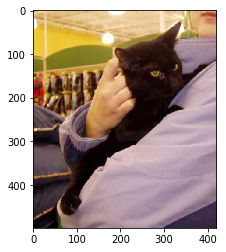

In [55]:
temp_image_name = 'cat.1749.jpg'
comparison_image = image_to_vector(temp_image_name)
show_image(temp_image_name)

In [56]:
# make a list of euclidian search scores against the image I am checking
search_scores = []

for feat in features:
    score = np.linalg.norm(feat-comparison_image)
    #score = 1 - distance.cosine(comparison_image, feat)
    search_scores.append(score)
    #print(score)
    
lowest = sorted(search_scores, key=float, reverse=False)
lowest[1]

199.88225

dog.3303.jpg
17562
199.882


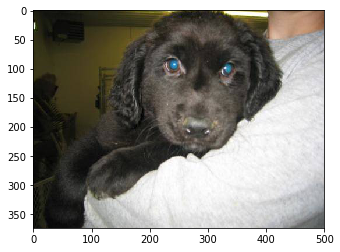

In [57]:
search_index = search_scores.index(lowest[1])
print(file_names[search_index])
show_image(file_names[search_index])
print(search_index)
print(lowest[1])

In [58]:
#search_scores[:10]

cat.6286.jpg
8375
203.189


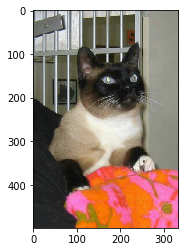

In [59]:
search_index = search_scores.index(lowest[2])
print(file_names[search_index])
show_image(file_names[search_index])
print(search_index)
print(lowest[2])

cat.6739.jpg
8878
205.5


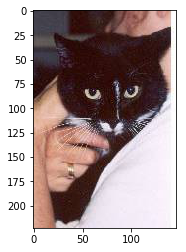

In [60]:
search_index = search_scores.index(lowest[3])
print(file_names[search_index])
show_image(file_names[search_index])
print(search_index)
print(lowest[3])

In [48]:
test = sorted(search_scores, key=float, reverse=False)

In [308]:
test

[0.0,
 204.24411,
 211.86879,
 211.87465,
 213.82671,
 214.14024,
 225.60524,
 226.14334,
 228.72588,
 228.843,
 230.84326,
 231.59869,
 233.06604,
 233.14386,
 234.11523,
 234.97632,
 238.28421,
 238.73895,
 238.78001,
 239.02931,
 241.62982,
 242.0051,
 242.099,
 242.9966,
 244.68999,
 245.27742,
 245.74208,
 246.68178,
 247.32207,
 247.34843,
 247.46925,
 247.77066,
 247.87961,
 248.01723,
 249.68654,
 251.02596,
 251.29558,
 251.71581,
 252.34416,
 252.6683,
 253.00708,
 253.21231,
 253.83771,
 254.17203,
 254.22809,
 254.91338,
 255.90604,
 256.01004,
 258.40463,
 258.77567,
 258.96036,
 259.02374,
 259.38797,
 259.44809,
 259.51181,
 259.70129,
 260.22604,
 260.24341,
 260.39548,
 260.72595,
 260.8945,
 261.00998,
 261.18582,
 262.50119,
 262.8457,
 263.05911,
 263.82446,
 264.18774,
 264.45731,
 265.74332,
 266.08432,
 266.84549,
 267.50229,
 267.68643,
 268.08923,
 268.36322,
 269.38565,
 269.41791,
 270.03702,
 270.07996,
 270.31998,
 270.4953,
 270.77304,
 270.987,
 271.02393

In [174]:
search_scores.index(test[1])

1

In [175]:
file_names[search_scores.index(test[1])]

'cat.1.jpg'

In [177]:
cat = file_names[search_scores.index(min(test))]
cat

'cat.0.jpg'

In [173]:
a = np.array([90,10,30,40,80,70,20,50,60,0,4,2])
np.partition(a, 2)[2]


4

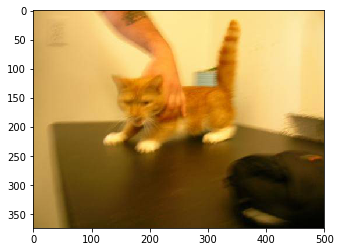

In [178]:

show_image(cat)